In [7]:
from keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
train_gen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_generator = train_gen.flow_from_directory('../data/101_ObjectCategories/', 
                                                target_size=img_size,
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='training',
                                               )
valid_generator = train_gen.flow_from_directory('../data/101_ObjectCategories/', 
                                                target_size=img_size,
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='validation',
                                               )

Using TensorFlow backend.


Found 6982 images belonging to 101 classes.
Found 1695 images belonging to 101 classes.


In [0]:
from model import DenseNet

In [0]:
densenet = DenseNet(101)

In [0]:
densenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = densenet.fit_generator(train_generator, 
                                steps_per_epoch=train_generator.n//train_generator.batch_size, 
                              validation_data=valid_generator, 
                              validation_steps=valid_generator.n//valid_generator.batch_size, 
                              epochs=50, 
                             )

W0713 11:53:51.839904 139796137842560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
218/218 [==============================] - 242s 1s/step - loss: 4.9965 - acc: 0.2939 - val_loss: 6.3533 - val_acc: 0.1905
Epoch 2/50
218/218 [==============================] - 203s 931ms/step - loss: 4.0272 - acc: 0.3873 - val_loss: 3.9870 - val_acc: 0.3680
Epoch 3/50
218/218 [==============================] - 201s 920ms/step - loss: 3.2617 - acc: 0.4717 - val_loss: 4.1058 - val_acc: 0.3151
Epoch 4/50
218/218 [==============================] - 201s 921ms/step - loss: 2.7242 - acc: 0.5434 - val_loss: 3.2417 - val_acc: 0.4269
Epoch 5/50
218/218 [==============================] - 201s 922ms/step - loss: 2.3046 - acc: 0.5946 - val_loss: 2.6442 - val_acc: 0.5436
Epoch 6/50
218/218 [==============================] - 201s 924ms/step - loss: 1.9868 - acc: 0.6495 - val_loss: 2.5241 - val_acc: 0.5454
Epoch 7/50
218/218 [==============================] - 201s 921ms/step - loss: 1.7340 - acc: 0.6958 - val_loss: 2.1410 - val_acc: 0.5923
Epoch 8/50
218/218 [==============================]

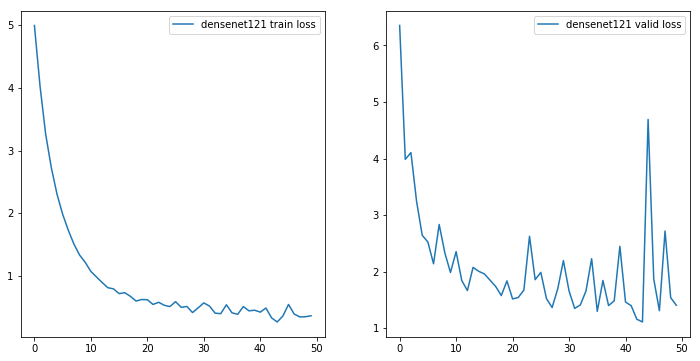

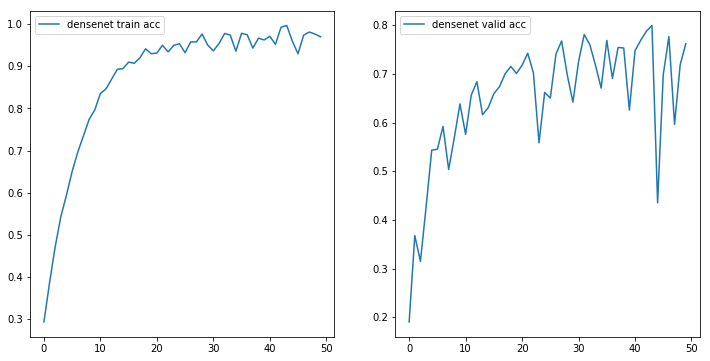

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='densenet121 train loss')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='densenet121 valid loss')
plt.legend(loc=0)
plt.savefig('loss.png')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(history.history['acc'])), history.history['acc'], label='densenet train acc')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(history.history['val_acc'])), history.history['val_acc'], label='densenet valid acc')
plt.legend(loc=0)

plt.savefig('accuracy.png')